<a href="https://colab.research.google.com/github/Amir-Shakiba/trash/blob/main/simple_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,_),(x_test,_) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0


In [ ]:
inputs = keras.Input(shape=(28,28,1))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(256)(x)
code = keras.layers.Dense(64)(x)

y = keras.layers.Dense(256)(code)
y = keras.layers.Dense(28*28*1)(y)
outputs = keras.layers.Reshape((28,28,1))(y)

decoder = keras.Model(code,outputs)
autoencoder = keras.Model(inputs,outputs)

autoencoder.compile(optimizer='adam',loss = 'mse')


In [ ]:
autoencoder.fit(x=x_train,y = x_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0132
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0099
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0098
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0098
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0098


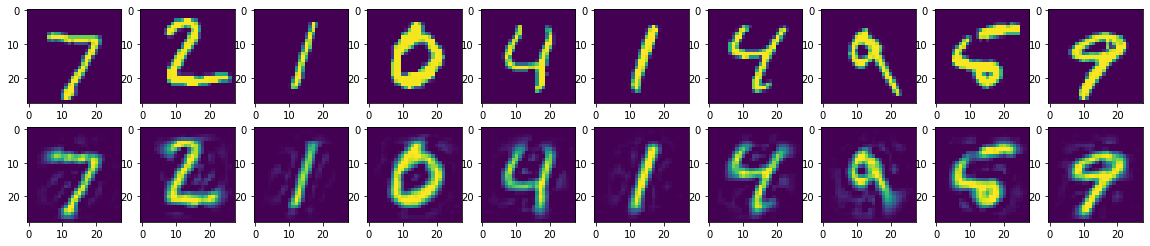

In [ ]:
images =x_test[:10]
predictions = autoencoder.predict(images)

f,axxr = plt.subplots(2,10,figsize = (20,4))

for i in range(10):
  axxr[0,i].imshow(images[i])
  axxr[1,i].imshow(np.clip(predictions[i,:,:,0],0,1))

In [ ]:
random_code = np.expand_dims( np.random.rand(64),0)

In [ ]:
prediction = decoder.predict(random_code)


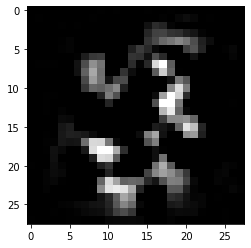

In [ ]:
plt.imshow(np.clip(prediction[0,:,:,0],0,1),cmap='gray')